In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('simulated_call_centre.csv')

# Explore the dataset
print(df.head())  # Display first few rows
print(df.describe())  # Get summary statistics of numerical columns
print(df.info())  # Get a summary of the data types and missing values


   call_id        date  daily_caller call_started call_answered  call_ended  \
0        1  2021-01-01             1   8:00:00 AM    8:00:00 AM  8:14:22 AM   
1        2  2021-01-01             2   8:02:42 AM    8:02:42 AM  8:07:31 AM   
2        3  2021-01-01             3   8:08:24 AM    8:08:24 AM  8:10:13 AM   
3        4  2021-01-01             4   8:09:37 AM    8:09:37 AM  8:13:45 AM   
4        5  2021-01-01             5   8:11:10 AM    8:11:10 AM  8:15:28 AM   

   wait_length  service_length  meets_standard  
0            0             863            True  
1            0             289            True  
2            0             108            True  
3            0             247            True  
4            0             258            True  
            call_id  daily_caller   wait_length  service_length
count  51708.000000  51708.000000  51708.000000    51708.000000
mean   25854.500000    104.193239     17.034927      299.102595
std    14926.958196     64.952880     6

In [2]:
import numpy as np
from datetime import datetime, timedelta

# Function to convert time to minutes
def convert_to_minutes(time_str):
    return datetime.strptime(time_str, '%I:%M:%S %p')

# Add a column for the time the call actually starts (if there is a wait)
df['call_started'] = df['call_started'].apply(convert_to_minutes)
df['call_ended'] = df['call_ended'].apply(convert_to_minutes)

# Simulating the queue
queue = []  # A list to represent the queue
waiting_times = []  # To track how long callers waited before their call was answered
service_times = []  # To track the service duration

# Simulate the calls
for idx, row in df.iterrows():
    if len(queue) == 0:  # If the queue is empty, this call is answered immediately
        waiting_times.append(0)
        service_times.append(row['service_length'])
    else:
        previous_call_end_time = queue[-1][1]  # Time when the previous call ended
        wait_time = max(0, (previous_call_end_time - row['call_started']).total_seconds() / 60)  # In minutes
        waiting_times.append(wait_time)
        service_times.append(row['service_length'])
    
    # Add the current call to the queue
    queue.append((row['call_started'], row['call_ended']))

df['waiting_time'] = waiting_times
df['actual_service_time'] = service_times

print(df[['call_id', 'waiting_time', 'actual_service_time']].head())


   call_id  waiting_time  actual_service_time
0        1      0.000000                  863
1        2     11.666667                  289
2        3      0.000000                  108
3        4      0.600000                  247
4        5      2.583333                  258


Average Waiting Time: 6.342109538175911 minutes
Average Service Time: 299.1025953430804 minutes
Percentage of Calls Meeting Standard: 91.82524947783709%


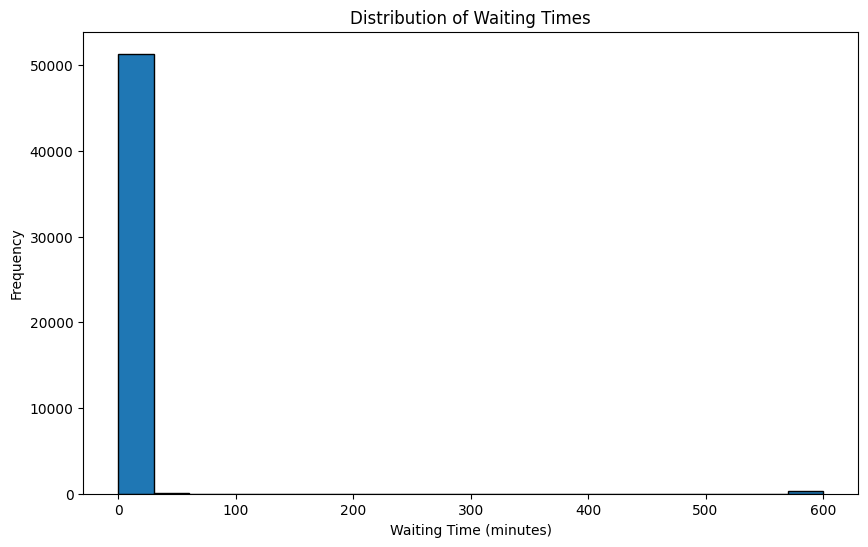

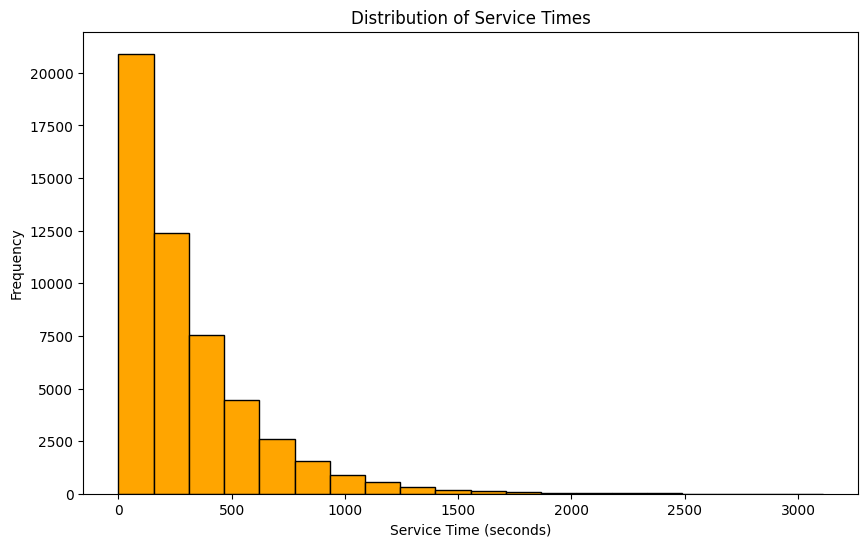

In [96]:
import matplotlib.pyplot as plt

# Calculate the average waiting time
avg_waiting_time = df['waiting_time'].mean()
avg_service_time = df['actual_service_time'].mean()

# Percentage of calls that meet the standard
meets_standard_percentage = df['meets_standard'].mean() * 100

print(f"Average Waiting Time: {avg_waiting_time} minutes")
print(f"Average Service Time: {avg_service_time} minutes")
print(f"Percentage of Calls Meeting Standard: {meets_standard_percentage}%")

# Visualization of waiting times
plt.figure(figsize=(10, 6))
plt.hist(df['waiting_time'], bins=20, edgecolor='black')
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualization of service times
plt.figure(figsize=(10, 6))
plt.hist(df['actual_service_time'], bins=20, edgecolor='black', color='orange')
plt.title('Distribution of Service Times')
plt.xlabel('Service Time (seconds)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Suppose we reduce the average service time by 20%
optimized_service_time = df['actual_service_time'] * 0.8

# Simulate the optimized scenario
optimized_waiting_times = []
optimized_service_times = []

for idx, row in df.iterrows():
    if len(queue) == 0:
        optimized_waiting_times.append(0)
        optimized_service_times.append(optimized_service_time[idx])
    else:
        previous_call_end_time = queue[-1][1]
        wait_time = max(0, (previous_call_end_time - row['call_started']).total_seconds() / 60)
        optimized_waiting_times.append(wait_time)
        optimized_service_times.append(optimized_service_time[idx])
    
    queue.append((row['call_started'], row['call_ended']))

df['optimized_waiting_time'] = optimized_waiting_times
df['optimized_service_time'] = optimized_service_times

# Calculate and compare the average values
avg_optimized_waiting_time = df['optimized_waiting_time'].mean()
avg_optimized_service_time = df['optimized_service_time'].mean()

print(f"Optimized Average Waiting Time: {avg_optimized_waiting_time} minutes")
print(f"Optimized Average Service Time: {avg_optimized_service_time} seconds")


Optimized Average Waiting Time: 6.353680603903973 minutes
Optimized Average Service Time: 239.28207627446437 seconds


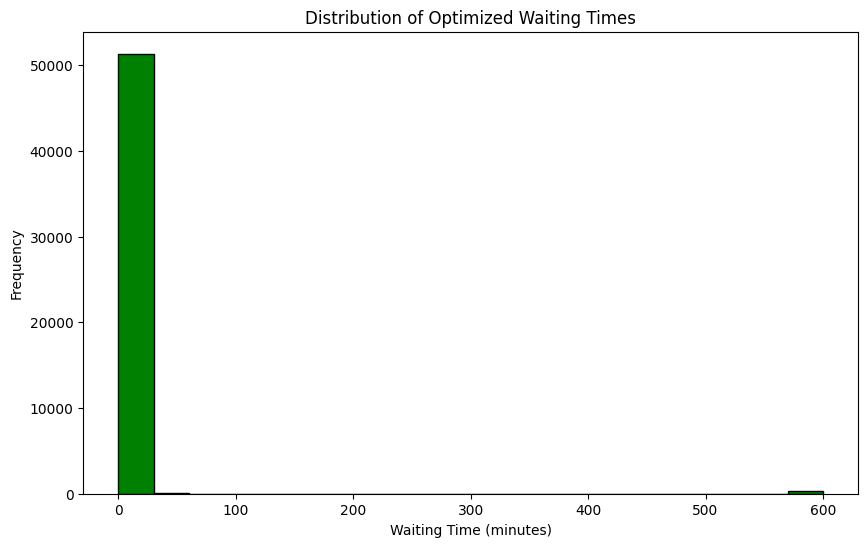

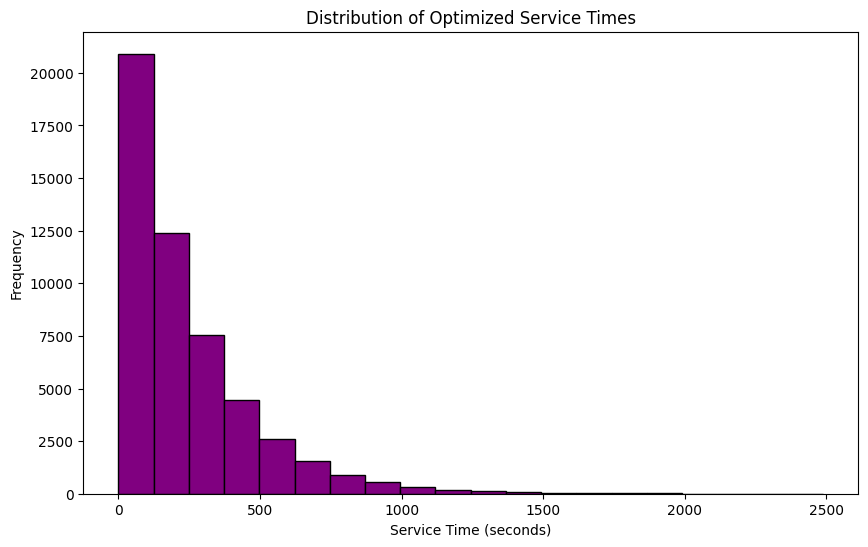

In [101]:
# Visualization of optimized waiting times
plt.figure(figsize=(10, 6))
plt.hist(df['optimized_waiting_time'], bins=20, edgecolor='black', color='green')
plt.title('Distribution of Optimized Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualization of optimized service times
plt.figure(figsize=(10, 6))
plt.hist(df['optimized_service_time'], bins=20, edgecolor='black', color='purple')
plt.title('Distribution of Optimized Service Times')
plt.xlabel('Service Time (seconds)')
plt.ylabel('Frequency')
plt.show()


Non-Optimized Performance:
Average Waiting Time: 6.34 minutes
Average Service Time: 299.10 seconds
Percentage of Calls Meeting Standard: 91.83%

Optimized Performance:
Optimized Average Waiting Time: 6.35 minutes
Optimized Average Service Time: 239.28 seconds


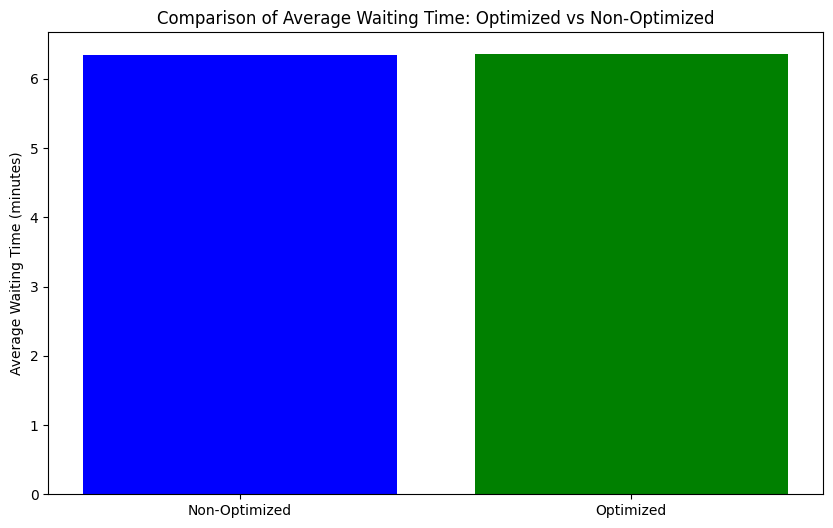

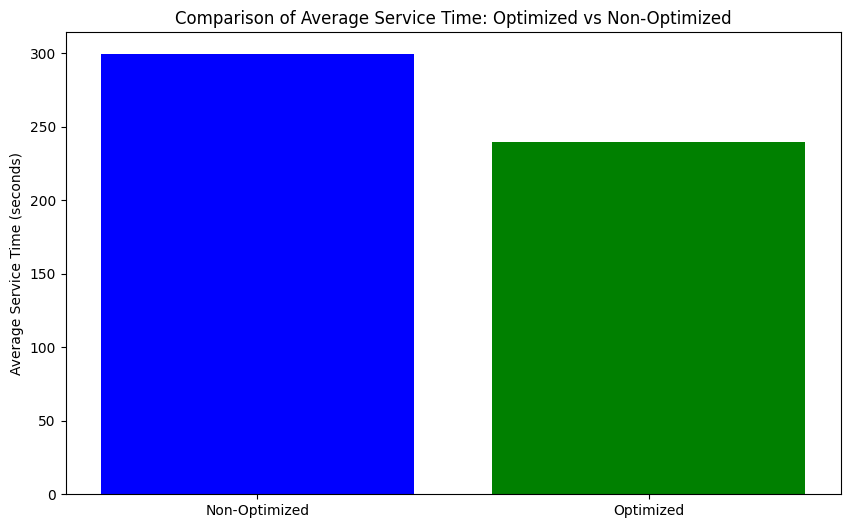

In [102]:
# Calculate key performance metrics for the non-optimized data
avg_waiting_time = df['waiting_time'].mean()
avg_service_time = df['actual_service_time'].mean()
meets_standard_percentage = df['meets_standard'].mean() * 100

# Calculate key performance metrics for the optimized data
avg_optimized_waiting_time = df['optimized_waiting_time'].mean()
avg_optimized_service_time = df['optimized_service_time'].mean()

# Print the comparison of the metrics
print("Non-Optimized Performance:")
print(f"Average Waiting Time: {avg_waiting_time:.2f} minutes")
print(f"Average Service Time: {avg_service_time:.2f} seconds")
print(f"Percentage of Calls Meeting Standard: {meets_standard_percentage:.2f}%")
print("\nOptimized Performance:")
print(f"Optimized Average Waiting Time: {avg_optimized_waiting_time:.2f} minutes")
print(f"Optimized Average Service Time: {avg_optimized_service_time:.2f} seconds")

# Visualization of the comparison: Average Waiting Time and Service Time
import matplotlib.pyplot as plt

labels = ['Non-Optimized', 'Optimized']
waiting_times = [avg_waiting_time, avg_optimized_waiting_time]
service_times = [avg_service_time, avg_optimized_service_time]

x = range(len(labels))

# Plot comparison for Waiting Time
plt.figure(figsize=(10, 6))
plt.bar(x, waiting_times, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Comparison of Average Waiting Time: Optimized vs Non-Optimized')
plt.show()

# Plot comparison for Service Time
plt.figure(figsize=(10, 6))
plt.bar(x, service_times, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Average Service Time (seconds)')
plt.title('Comparison of Average Service Time: Optimized vs Non-Optimized')
plt.show()
